In [1]:
import matplotlib.pyplot as plt

plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['axes.facecolor'] = '#849896'
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = { 'facecolor': 'none' }

# Data Generation

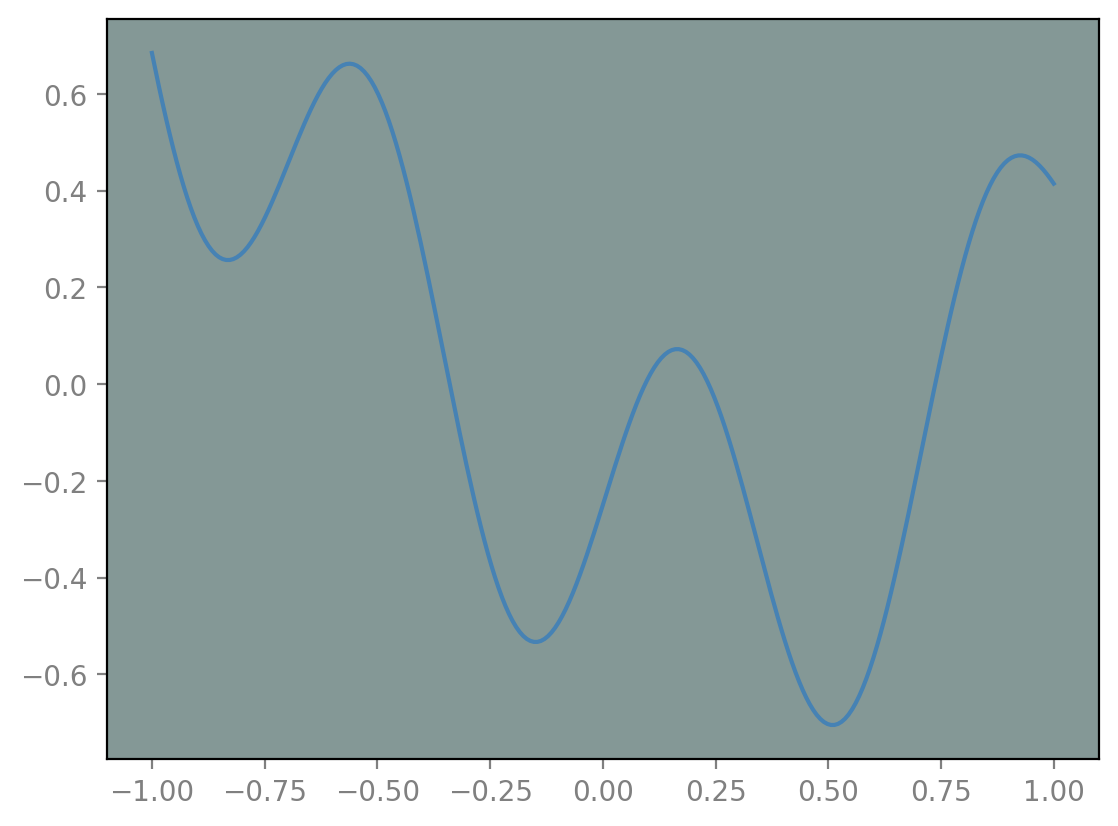

In [2]:
import numpy as np


n = 256

def f(x: np.ndarray):
    return 0.3 * x ** 3 + 0.8 * x ** 2 - 0.6 * x + 0.4 * np.sin(9 * x) - 0.25

x_train = np.linspace(-1, 1, n).reshape(n, 1)
y_train = f(x_train)
plt.plot(x_train, y_train, color='steelblue');

# Training a Model

In [3]:
import zoograd as zg


model = zg.Sequential(
    zg.Linear(1, 96),
    zg.Sigmoid(),
    zg.Linear(96, 96),
    zg.Sigmoid(),
    zg.Linear(96, 1)
)

optim = zg.Adam(model.parameters(), 0.01)
loss = zg.MAE()

In [4]:
n_epochs = 10_000

for _ in range(n_epochs):
    
    y_pred = model.forward(x_train)
    
    loss_value, upstream_grad = loss(y_pred, y_train, return_upstream_grad=True)
    
    model.backward(upstream_grad)

    optim.step(zero_grad=True)

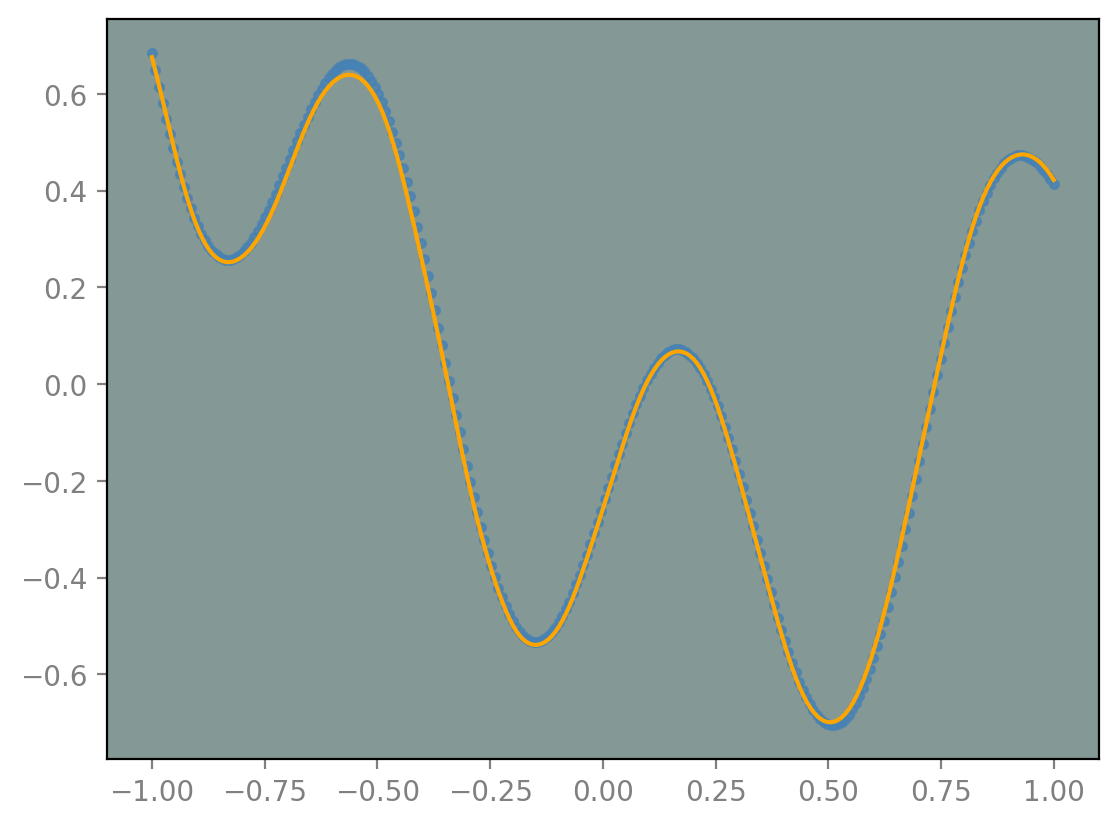

In [5]:
plt.scatter(x_train, y_train, marker='.', color='steelblue', alpha=0.75);
plt.plot(x_train, y_pred, color='orange');